# Trabajamos con el ejercicio anterior Arboles de Decision

In [3]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv", sep = ",")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Obtener las dimensiones
total_data.shape

(768, 9)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


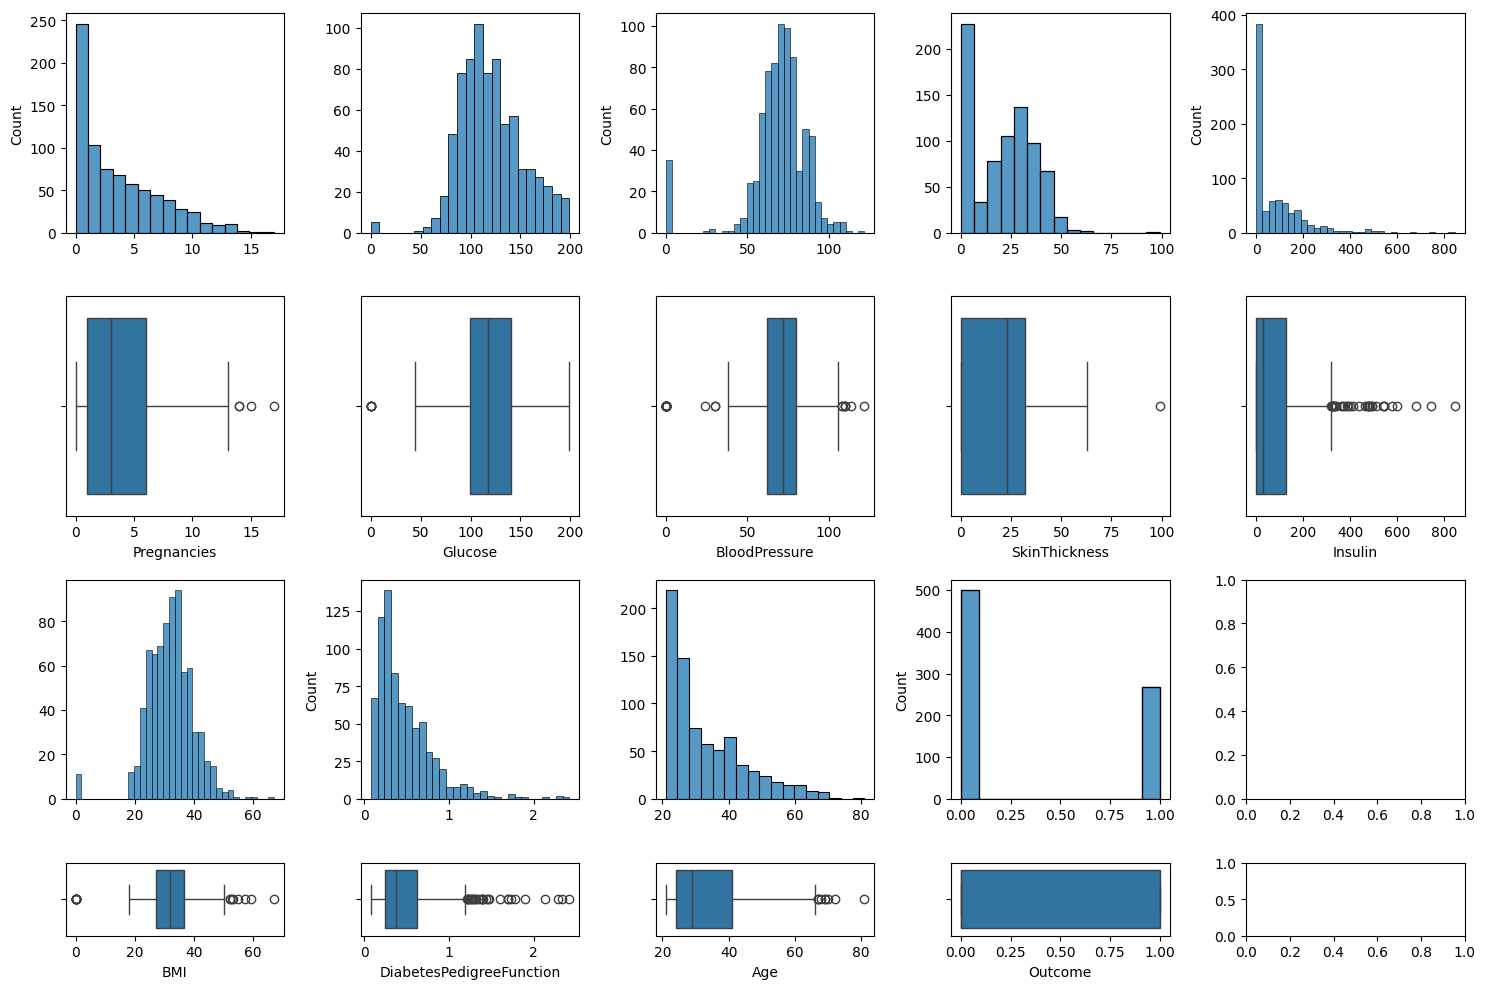

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 5, figsize=(15, 10), gridspec_kw={'height_ratios': [6, 6, 6, 2]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=total_data, x="Pregnancies").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=total_data, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=total_data, x="Glucose").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=total_data, x="Glucose")
sns.histplot(ax=axis[0, 2], data=total_data, x="BloodPressure").set(xlabel=None)
sns.boxplot(ax=axis[1, 2], data=total_data, x="BloodPressure")
sns.histplot(ax=axis[0, 3], data=total_data, x="SkinThickness").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 3], data=total_data, x="SkinThickness")
sns.histplot(ax=axis[0, 4], data=total_data, x="Insulin").set(xlabel=None)
sns.boxplot(ax=axis[1, 4], data=total_data, x="Insulin")
sns.histplot(ax=axis[2, 0], data=total_data, x="BMI").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=total_data, x="BMI")
sns.histplot(ax=axis[2, 1], data=total_data, x="DiabetesPedigreeFunction").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=total_data, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[2, 2], data=total_data, x="Age").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 2], data=total_data, x="Age")
sns.histplot(ax=axis[2, 3], data=total_data, x="Outcome").set(xlabel=None)
sns.boxplot(ax=axis[3, 3], data=total_data, x="Outcome")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

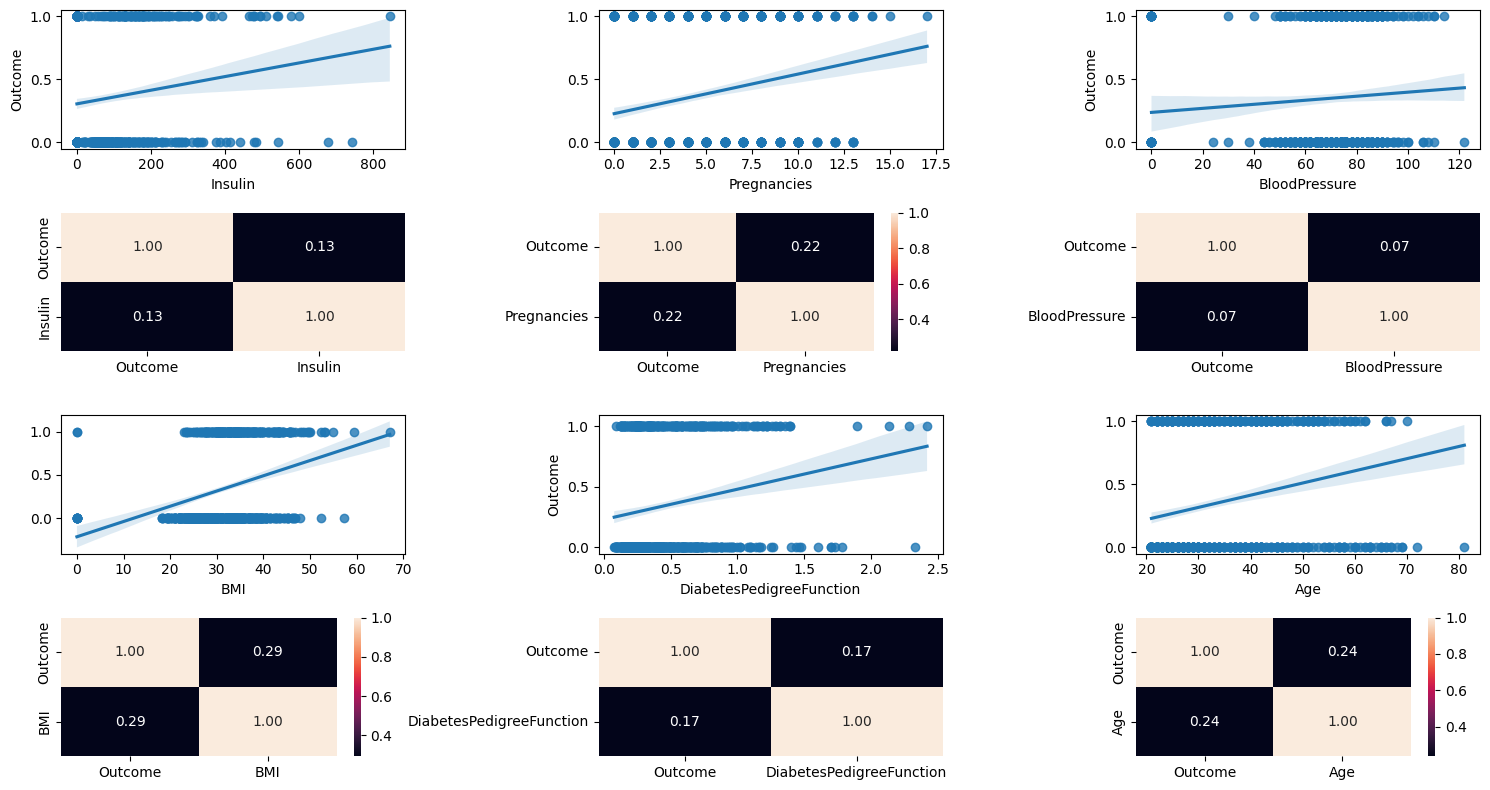

In [9]:
fig, axis = plt.subplots(4, 3, figsize=(15, 8))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax=axis[0, 0], data=total_data, x="Insulin", y="Outcome")
sns.heatmap(total_data[["Outcome", "Insulin"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(ax=axis[0, 1], data=total_data, x="Pregnancies", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Pregnancies"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

sns.regplot(ax=axis[0, 2], data=total_data, x="BloodPressure", y="Outcome")
sns.heatmap(total_data[["Outcome", "BloodPressure"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)

sns.regplot(ax=axis[2, 0], data=total_data, x="BMI", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "BMI"]].corr(), annot=True, fmt=".2f", ax=axis[3,0])

sns.regplot(ax=axis[2, 1], data=total_data, x="DiabetesPedigreeFunction", y="Outcome")
sns.heatmap(total_data[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(ax=axis[2, 2], data=total_data, x="Age", y="Outcome").set(ylabel=None)
sns.heatmap(total_data[["Outcome", "Age"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

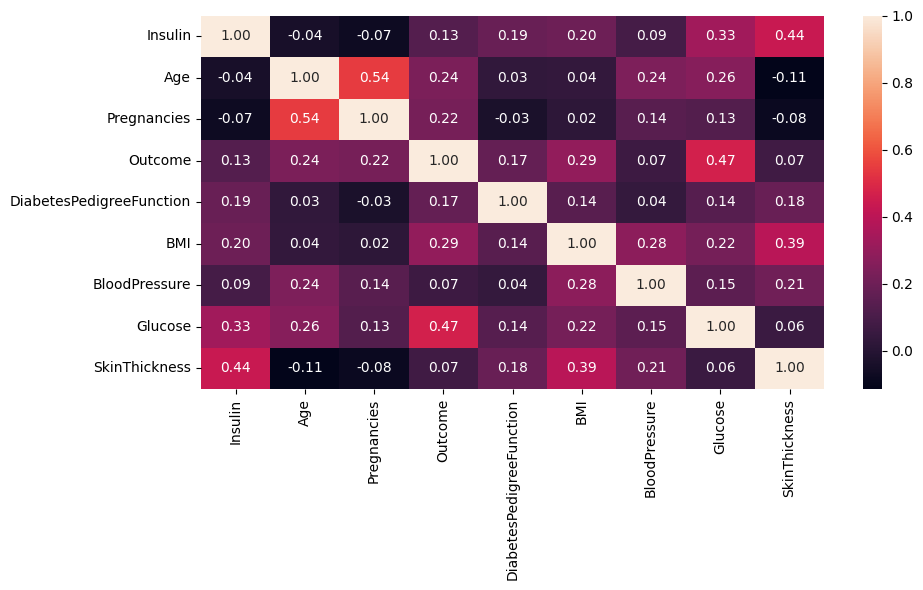

In [10]:
# CORRELACION
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["Insulin", "Age", "Pregnancies", "Outcome", "DiabetesPedigreeFunction", "BMI", "BloodPressure", "Glucose", "SkinThickness" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [11]:
# Outliers
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


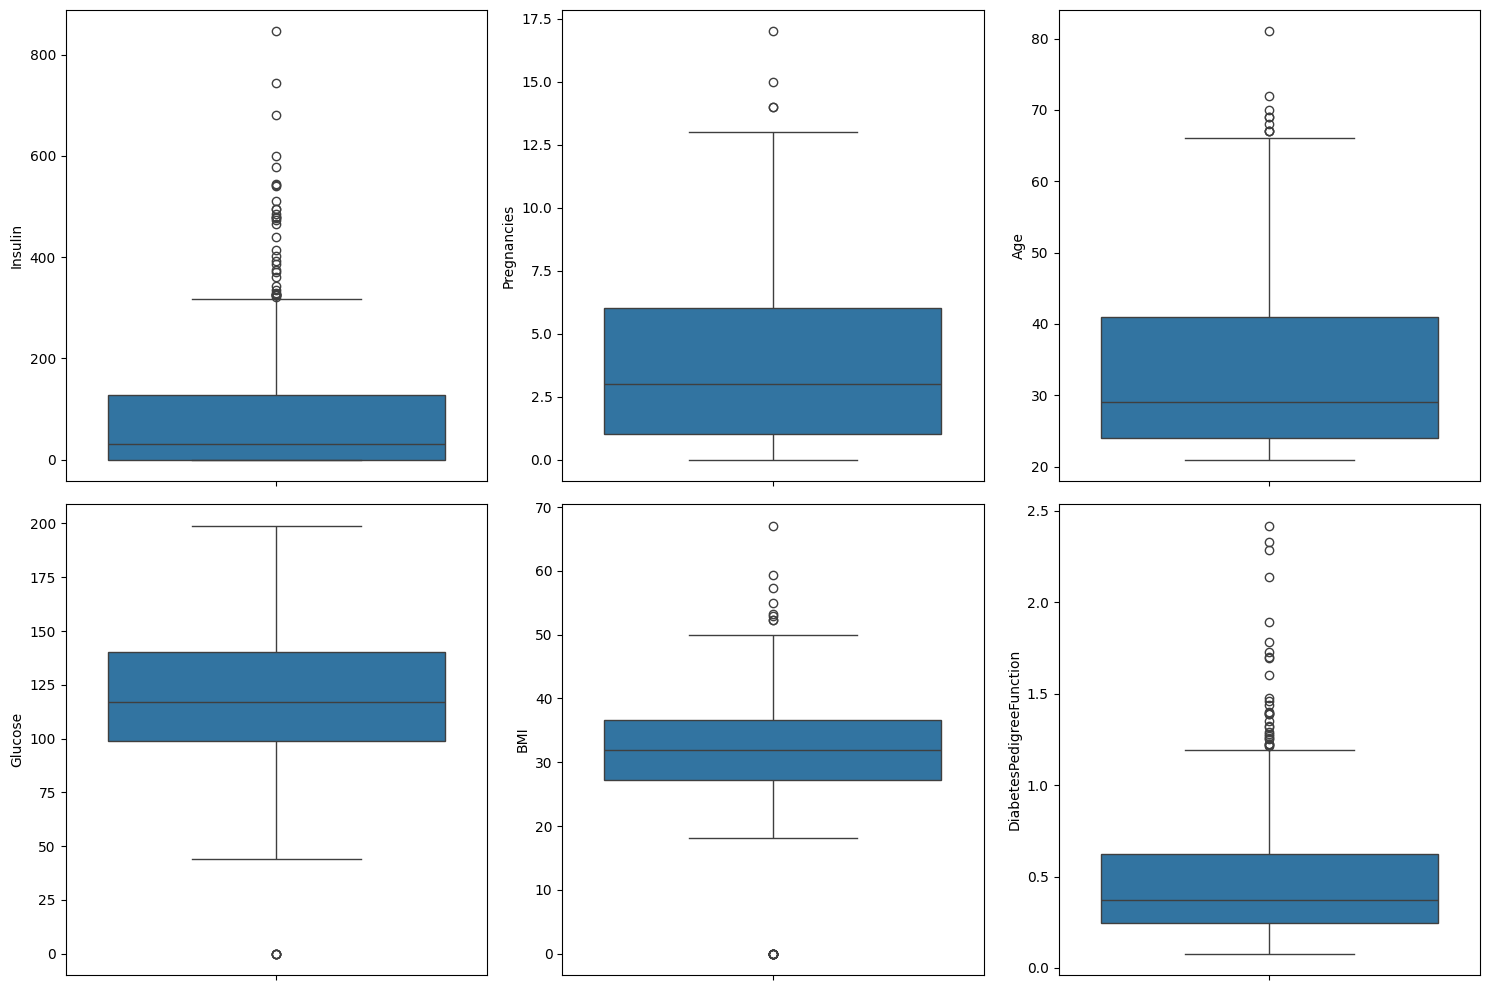

In [12]:
fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "Insulin")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "Age")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "Glucose")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "BMI")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "DiabetesPedigreeFunction")


plt.tight_layout()

plt.show()

In [13]:
insulin_stats = total_data["Insulin"].describe()
print(insulin_stats)

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64


In [14]:
insulin_iqr = insulin_stats["75%"] - insulin_stats["25%"]
upper_limit = insulin_stats["75%"] + 1.5 * insulin_iqr
lower_limit = insulin_stats["25%"] - 1.5 * insulin_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(insulin_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 318.12 y -190.88, con un rango intercuartílico de 127.25


In [15]:
total_data[total_data["Insulin"] < 600]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
bmi_stats = total_data["BMI"].describe()
print(bmi_stats)

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


In [17]:
bmi_iqr = insulin_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(bmi_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 186.52 y -122.63, con un rango intercuartílico de 99.95


In [18]:
total_data[total_data["BMI"] < 60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# Escalado de valores (Para Normalizar)
from sklearn.model_selection import train_test_split

num_variables = ["Insulin", "Age", "Pregnancies", "DiabetesPedigreeFunction", "BMI", "BloodPressure", "Glucose", "SkinThickness"]

# We divide the dataset into training and test samples
X = total_data.drop("Outcome", axis = 1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Insulin,Age,Pregnancies,DiabetesPedigreeFunction,BMI,BloodPressure,Glucose,SkinThickness
60,0,21,2,0.304,0.0,0,84,0
618,0,50,9,1.282,28.2,82,112,24
346,83,22,1,0.654,28.7,46,139,19
294,0,65,0,0.254,21.9,50,161,0
231,370,46,6,0.238,46.2,80,134,37


In [21]:
# Normalizacion
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,Insulin,Age,Pregnancies,DiabetesPedigreeFunction,BMI,BloodPressure,Glucose,SkinThickness
60,-0.701206,-1.035940,-0.526397,-0.490735,-4.135256,-3.752683,-1.151398,-1.322774
618,-0.701206,1.487101,1.588046,2.415030,-0.489169,0.680345,-0.276643,0.233505
346,0.013448,-0.948939,-0.828460,0.549161,-0.424522,-1.265862,0.566871,-0.090720
294,-0.701206,2.792122,-1.130523,-0.639291,-1.303720,-1.049617,1.254179,-1.322774
231,2.484601,1.139095,0.681856,-0.686829,1.838121,0.572222,0.410665,1.076490


In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,Insulin,Age,Pregnancies,DiabetesPedigreeFunction,BMI,BloodPressure,Glucose,SkinThickness
60,0.000000,0.000000,0.117647,0.096499,0.000000,0.000000,0.422111,0.000000
618,0.000000,0.483333,0.529412,0.514091,0.420268,0.672131,0.562814,0.380952
346,0.098109,0.016667,0.058824,0.245944,0.427720,0.377049,0.698492,0.301587
294,0.000000,0.733333,0.000000,0.075149,0.326379,0.409836,0.809045,0.000000
231,0.437352,0.416667,0.352941,0.068318,0.688525,0.655738,0.673367,0.587302


In [23]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 8 queremos decir implícitamente que no queremos eliminar características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 8)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Insulin,Age,Pregnancies,DiabetesPedigreeFunction,BMI,BloodPressure,Glucose,SkinThickness
0,0.0,21.0,2.0,0.304,0.0,0.0,84.0,0.0
1,0.0,50.0,9.0,1.282,28.2,82.0,112.0,24.0
2,83.0,22.0,1.0,0.654,28.7,46.0,139.0,19.0
3,0.0,65.0,0.0,0.254,21.9,50.0,161.0,0.0
4,370.0,46.0,6.0,0.238,46.2,80.0,134.0,37.0


In [24]:
X_test_sel.head()

,Insulin,Age,Pregnancies,DiabetesPedigreeFunction,BMI,BloodPressure,Glucose,SkinThickness
0,190.0,43.0,6.0,0.430,34.0,58.0,98.0,33.0
1,0.0,21.0,2.0,0.148,35.7,75.0,112.0,32.0
2,0.0,21.0,2.0,0.158,30.8,64.0,108.0,0.0
3,0.0,34.0,8.0,0.856,24.6,80.0,107.0,0.0
4,0.0,50.0,7.0,0.210,29.9,90.0,136.0,0.0


In [25]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

In [26]:
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

RANDOM FOREST PARA CLASIFICACION

In [27]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Insulin,Age,Pregnancies,DiabetesPedigreeFunction,BMI,BloodPressure,Glucose,SkinThickness,Outcome
0,0.0,21.0,2.0,0.304,0.0,0.0,84.0,0.0,0
1,0.0,50.0,9.0,1.282,28.2,82.0,112.0,24.0,1
2,83.0,22.0,1.0,0.654,28.7,46.0,139.0,19.0,0
3,0.0,65.0,0.0,0.254,21.9,50.0,161.0,0.0,0
4,370.0,46.0,6.0,0.238,46.2,80.0,134.0,37.0,1


In [28]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 60, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

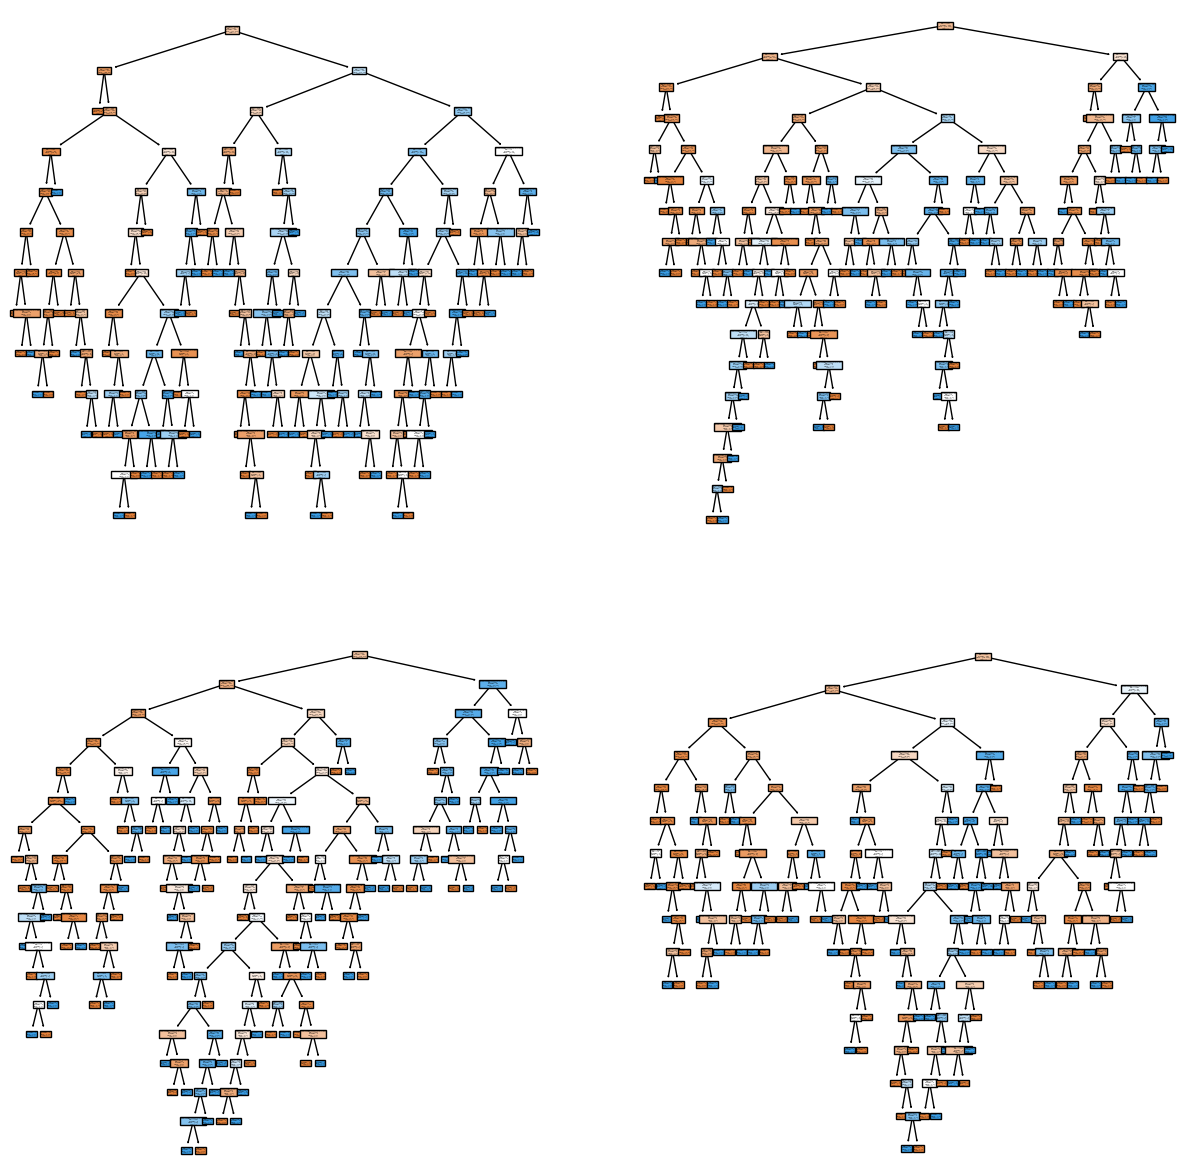

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7402597402597403

Modifico los parametro 1


In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 75, bootstrap = True, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=75, random_state=42)

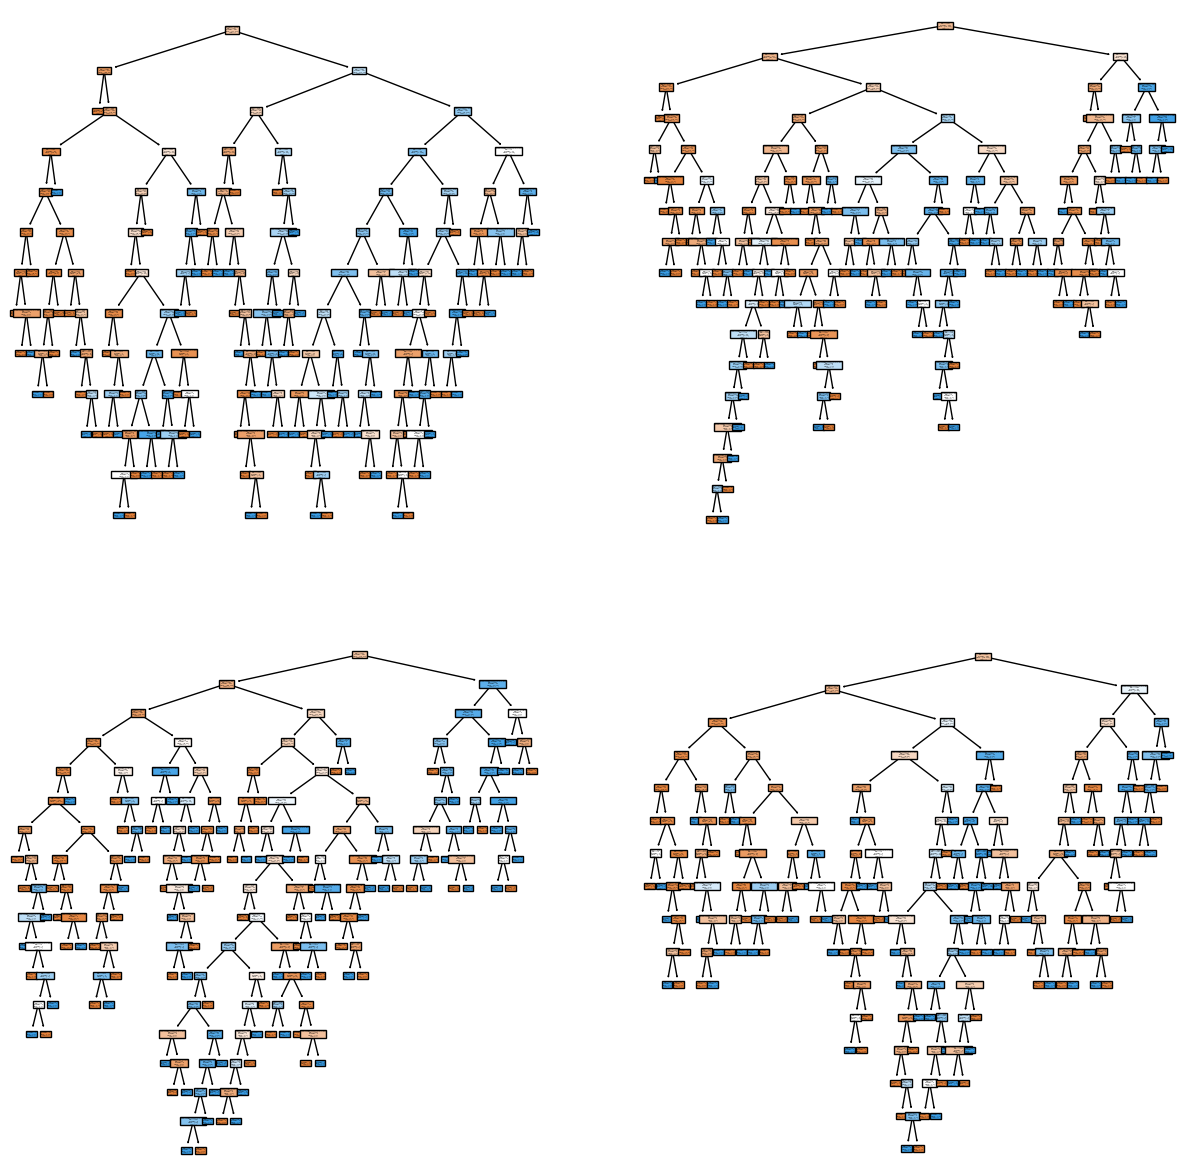

In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)


plt.show()


In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7402597402597403

Modifico los parametro 2

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 45, bootstrap = False, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, n_estimators=45, random_state=42)

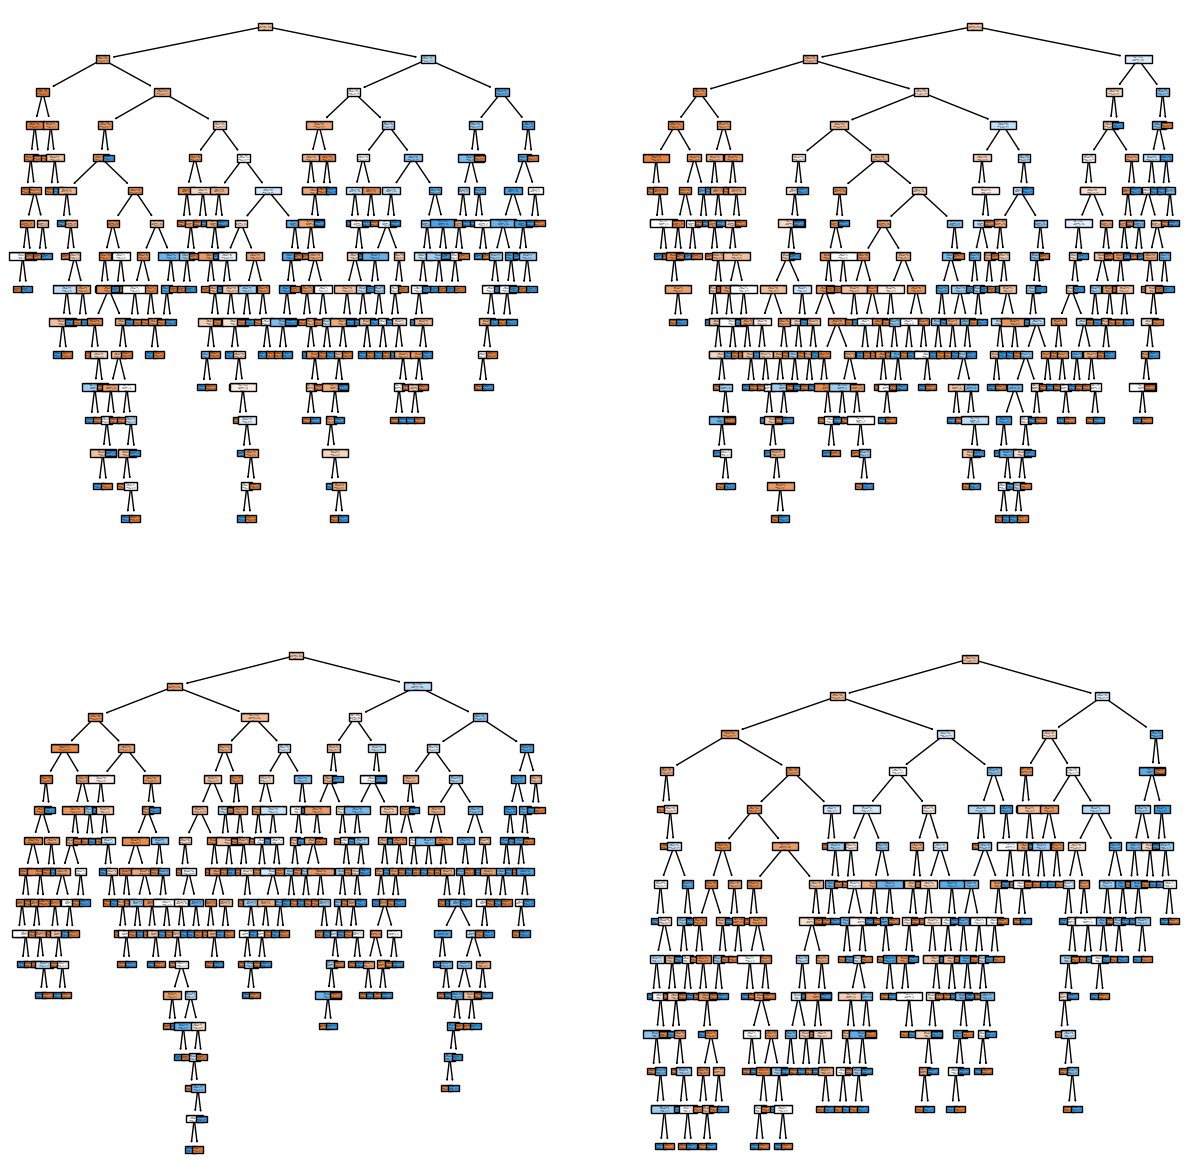

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# Mostramos los 4 primeros árboles de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7532467532467533

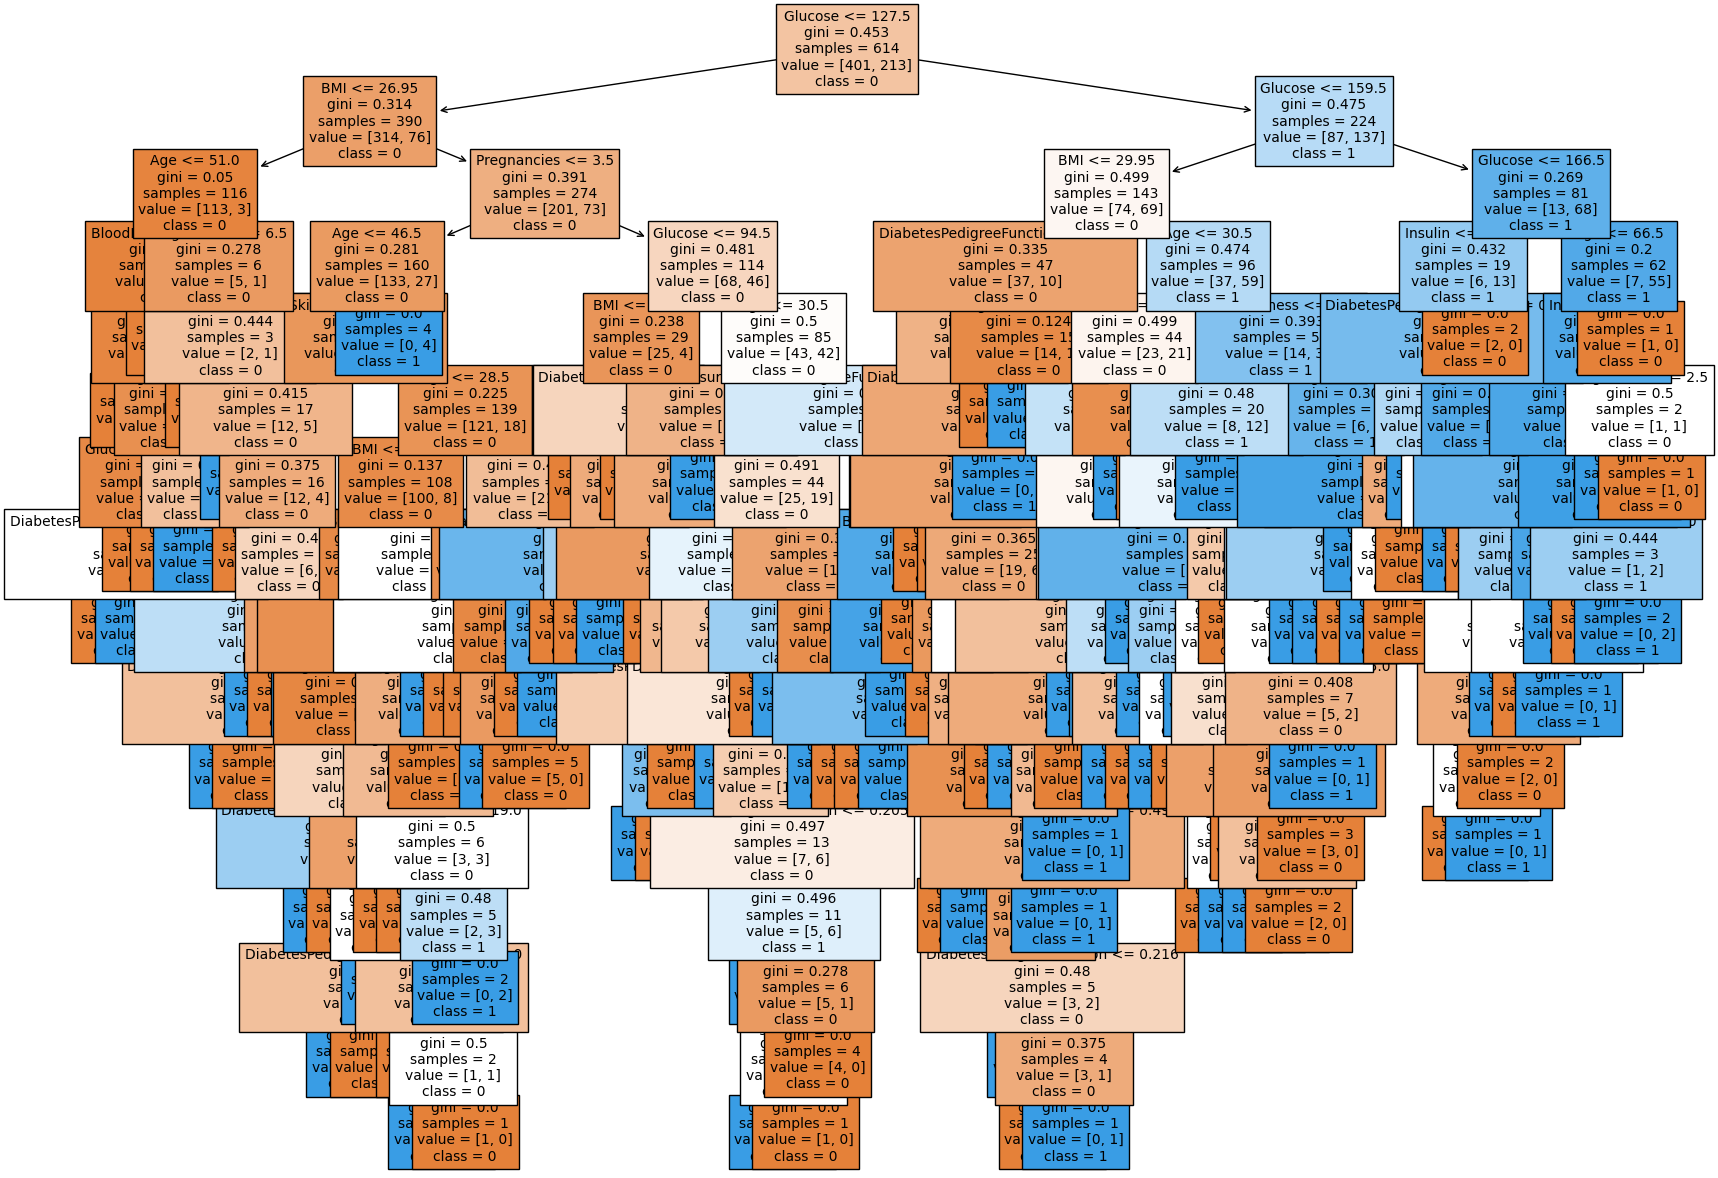

In [41]:
import matplotlib.pyplot as plt
from sklearn import tree

# Crear solo un gráfico
fig, axis = plt.subplots(figsize=(20, 15))

# Muestra el primer árbol de los 100 generados (por defecto)
tree.plot_tree(model.estimators_[0], ax=axis, feature_names=list(X_train.columns), class_names=["0", "1", "2"], filled=True, fontsize=10)

plt.show()

Clonclusion:

Viendo los resultados, sin mover ningun parametro, la primera grafica es la que mejor nos da como resultado en el modelo. En la grafica se visualiza que hay mas ramas que en las demas, por ellos tenemos mejor resultado.

Al poner como parametro bootstrap FALSE tambien podemos afirmar que los resultados mejoran que si es TRUE.


In [42]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import subprocess
import os

# Directorio donde se guardarán las imágenes .png
png_directory = "arboles"
os.makedirs(png_directory, exist_ok=True)
# Convertir archivos .dot a imágenes .png
for tree_number, tree in enumerate(model.estimators_):
    # Visualize the decision tree using Graphviz
    dot_data = export_graphviz(tree, out_file=None,
                               feature_names=X_train.columns,
                               class_names = list(map(str, y_train.unique())),
                               filled=True, rounded=True,
                               special_characters=True)

    # Guardar cada árbol como un archivo .dot
    dot_filename = f"tree_{tree_number}.dot"
    dot_path = os.path.join(png_directory, dot_filename)
    with open(dot_path, 'w') as dot_file:
        dot_file.write(dot_data)

    # Convertir .dot a .png
    png_filename = f"tree_{tree_number}.png"
    png_path = os.path.join(png_directory, png_filename)
    #subprocess.run(["dot", "-Tpng", dot_path, "-o", png_path])
    print(f"Tree {tree_number} saved as {png_filename}")

Tree 0 saved as tree_0.png
Tree 1 saved as tree_1.png
Tree 2 saved as tree_2.png
Tree 3 saved as tree_3.png
Tree 4 saved as tree_4.png
Tree 5 saved as tree_5.png
Tree 6 saved as tree_6.png
Tree 7 saved as tree_7.png
Tree 8 saved as tree_8.png
Tree 9 saved as tree_9.png
Tree 10 saved as tree_10.png
Tree 11 saved as tree_11.png
Tree 12 saved as tree_12.png
Tree 13 saved as tree_13.png
Tree 14 saved as tree_14.png
Tree 15 saved as tree_15.png
Tree 16 saved as tree_16.png
Tree 17 saved as tree_17.png
Tree 18 saved as tree_18.png
Tree 19 saved as tree_19.png
Tree 20 saved as tree_20.png
Tree 21 saved as tree_21.png
Tree 22 saved as tree_22.png
Tree 23 saved as tree_23.png
Tree 24 saved as tree_24.png
Tree 25 saved as tree_25.png
Tree 26 saved as tree_26.png
Tree 27 saved as tree_27.png
Tree 28 saved as tree_28.png
Tree 29 saved as tree_29.png
Tree 30 saved as tree_30.png
Tree 31 saved as tree_31.png
Tree 32 saved as tree_32.png
Tree 33 saved as tree_33.png
Tree 34 saved as tree_34.png
Tree 